## For Predective model for continuous data "Regresssion Analysis" is performed

### Simple Regression (single Variable)

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('02/demos/datasets/kc_house_data.csv')

In [39]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [40]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4305,2473410740,20141027T000000,315000.0,3,1.75,1460,7884,1.0,0,0,...,8,1460,0,1975,0,98058,47.4457,-122.128,2050,7210
14397,1245001216,20140721T000000,700000.0,3,2.75,2190,11060,1.0,0,0,...,7,1610,580,1973,0,98033,47.6893,-122.208,2020,8588
8272,6046400755,20150511T000000,475000.0,5,1.75,2020,5100,1.5,0,0,...,7,1320,700,1911,0,98103,47.6915,-122.345,1130,5100
7233,7399300780,20150429T000000,337500.0,3,2.25,1530,6600,1.0,0,0,...,7,1240,290,1968,0,98055,47.4620,-122.188,1500,7700
11544,8566100160,20141022T000000,840000.0,5,1.75,2500,11617,1.0,0,0,...,9,1560,940,1966,0,98040,47.5361,-122.217,3370,11617
8642,9144100298,20150302T000000,380000.0,3,1.00,1260,7980,1.0,0,0,...,7,1260,0,1951,0,98177,47.7013,-122.373,1760,7606
4431,8718500495,20140730T000000,375000.0,4,1.75,2190,9225,1.0,0,0,...,7,1250,940,1959,0,98028,47.7396,-122.256,2190,9225
16278,796000235,20150401T000000,209950.0,2,1.00,1050,6250,1.0,0,0,...,6,840,210,1943,0,98168,47.5024,-122.333,1310,12500
3701,8860300300,20140902T000000,610000.0,4,2.75,2090,8400,1.0,0,0,...,8,1240,850,1976,0,98052,47.6872,-122.123,2340,9000
8169,191100665,20150413T000000,630000.0,2,1.00,1050,8382,1.0,0,0,...,7,1050,0,1959,0,98040,47.5627,-122.221,2400,9525


In [41]:
df.drop(['zipcode','lat', 'long','id'],inplace=True,axis=1)

In [42]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
5030,20140811T000000,464000.0,3,2.50,2460,5400,1.0,0,0,4,8,1520,940,2001,0,1745,5400
20705,20150413T000000,396000.0,2,1.50,950,865,3.0,0,0,3,8,950,0,2006,0,1290,1189
11743,20150331T000000,485000.0,3,1.75,1790,6775,1.0,0,2,3,8,1790,0,1951,0,1310,6028
10044,20150302T000000,585000.0,2,1.00,1110,6000,1.0,0,0,3,7,1010,100,1951,0,1410,3500
18185,20141022T000000,825000.0,4,3.50,3620,6499,2.5,0,0,3,9,3620,0,2003,2009,2330,7200
3032,20140925T000000,160000.0,4,1.00,1520,7298,1.5,0,0,3,7,1520,0,1960,0,1520,7298
18407,20140812T000000,822500.0,2,1.00,1450,7098,1.0,0,4,3,7,1450,0,1924,0,2390,6098
1810,20141118T000000,480000.0,3,2.50,2360,9005,1.0,0,0,5,7,1340,1020,1929,0,1520,9005
12707,20150218T000000,245000.0,2,1.00,1020,15000,1.5,0,0,3,6,1020,0,1933,0,1480,14519
7429,20140827T000000,203000.0,3,1.75,1490,8000,1.0,0,0,4,7,1200,290,1978,0,1540,8000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13), object(1)
memory usage: 2.8+ MB


In [44]:
df['date']=pd.to_datetime(df['date'])

In [45]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
298,2014-06-02,404000.0,3,1.50,2030,8880,1.0,0,0,3,7,1330,700,1963,0,2140,5592
17796,2014-10-28,389000.0,4,2.50,2420,9147,2.0,0,0,3,10,2420,0,1998,0,1400,7200
17557,2014-11-13,260000.0,2,1.50,980,1296,2.0,0,0,3,7,840,140,2001,0,1100,1228
2315,2014-09-15,665000.0,4,2.50,2080,8100,1.0,0,2,5,8,1220,860,1952,0,2090,8100
3885,2015-04-29,248000.0,2,1.00,770,8600,1.0,0,0,4,4,770,0,1914,0,1420,6960
2153,2014-11-19,1010000.0,4,3.50,3350,3752,2.0,0,0,3,9,2550,800,2007,0,1050,4960
13508,2014-06-20,869000.0,4,3.00,3740,30884,2.0,0,0,3,9,3060,680,1988,0,3240,37031
6819,2014-12-09,269500.0,4,2.25,1700,7056,2.0,0,0,3,7,1700,0,1999,0,1650,6025
8976,2014-09-26,450000.0,3,2.50,2820,10208,1.0,0,1,4,8,1410,1410,1954,0,1540,10684
15347,2014-05-19,1468000.0,4,3.25,5010,34460,2.0,0,0,3,12,5010,0,1988,0,4760,34460


In [46]:
df['house_age']=df['date'].dt.year-df['yr_built']

In [47]:
df.drop(columns=['date','yr_built'],inplace=True)

In [48]:
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
10256,720001.0,3,2.50,1430,2200,1.5,0,0,4,7,1430,0,0,1740,4275,104
6171,352000.0,4,1.50,1440,8680,1.5,0,0,3,7,1440,0,0,1440,9000,93
5089,803000.0,2,1.00,1440,33747,1.5,0,0,3,7,1440,0,0,1980,8400,87
8162,576250.0,2,1.75,1530,5000,2.0,0,0,4,7,1260,270,0,1470,5000,26
16021,396500.0,3,1.50,1360,1488,2.0,0,0,3,7,1120,240,0,1360,1573,11
210,320000.0,4,2.25,1550,7579,2.0,0,0,3,8,1550,0,0,1630,6397,22
4151,825000.0,5,3.00,4080,7500,2.0,0,2,4,8,2720,1360,0,2000,4545,53
17376,836500.0,3,2.50,2230,7200,3.0,0,3,3,9,2230,0,0,2230,7200,18
13905,428000.0,3,1.75,2120,9350,1.0,0,0,3,7,1280,840,0,2200,9000,35
8596,281000.0,3,1.50,1280,974,3.0,0,0,3,7,1280,0,0,1420,1422,11


In [49]:
df['house_renovated']=df['yr_renovated'].apply(lambda x:0 if x==0 else 1)

In [50]:
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age,house_renovated
2639,395000.0,3,1.75,1480,7700,1.0,0,0,3,8,1480,0,0,1930,8560,39,0
9670,865000.0,3,1.75,1480,8163,1.0,0,0,3,7,1040,440,0,2170,11124,62,0
17356,905000.0,4,3.00,3370,47959,2.0,0,0,4,10,3370,0,0,3370,38896,33,0
11727,1280000.0,4,3.00,3260,4500,2.0,0,0,3,9,2300,960,2014,2410,4995,84,1
4196,581000.0,4,1.75,2090,8164,1.0,0,0,4,8,1070,1020,0,1310,7975,51,0
9212,205000.0,3,2.25,1250,952,3.0,0,0,3,8,1250,0,0,1250,1030,7,0
13110,1135000.0,4,4.25,4590,17621,2.0,0,0,3,10,3160,1430,0,3800,12268,11,0
18635,179950.0,2,1.00,1100,7323,1.0,0,0,3,7,780,320,0,1410,7227,32,0
13772,289000.0,2,1.00,1010,7740,1.0,0,0,3,6,890,120,0,1030,6000,90,0
14133,460000.0,4,1.75,1560,7200,1.0,0,0,3,6,860,700,0,1420,7200,72,0


In [51]:
df['house_renovated'].value_counts()

0    20699
1      914
Name: house_renovated, dtype: int64

In [52]:
df.drop(columns=['yr_renovated'],inplace=True)

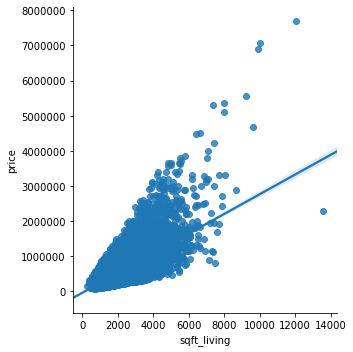

In [53]:
sns.lmplot('sqft_living','price',data=df)
plt.show()

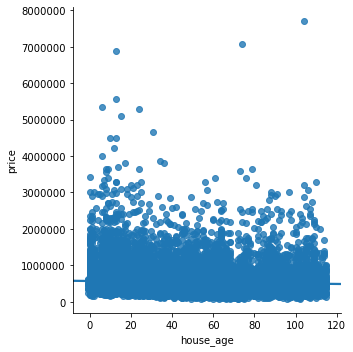

In [54]:
sns.lmplot('house_age','price',data=df)
plt.show()

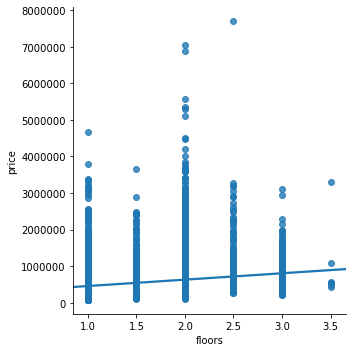

In [55]:
sns.lmplot('floors','price',data=df)
plt.show()

#### From above so far we can be sure that sqft is having impact on price of the house. So we Use this variable as single predictor for regression analysis

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [57]:
x=df[['sqft_living']]

In [58]:
y=df['price']

In [59]:
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [61]:
scaler=StandardScaler()

In [62]:
x_train=scaler.fit_transform(x_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
x_test=scaler.fit_transform(x_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
linera_reg=LinearRegression()

In [65]:
model=linera_reg.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [66]:
df_out = pd.DataFrame({'test':y_test,'pred':y_pred})
df_out.sample(10)

,test,pred
16543,293000.0,483837.708447
12402,355000.0,532224.867469
2442,485000.0,882320.194512
18973,560000.0,572073.116076
14215,1285000.0,799777.393827
4511,555000.0,429757.942481
9824,372000.0,614767.668154
13124,381000.0,557841.598716
15781,517000.0,446835.763312
1502,300000.0,520839.653581


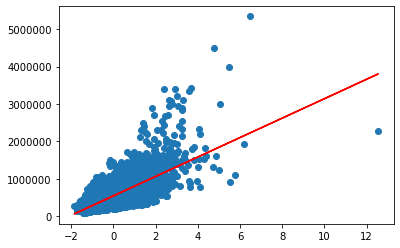

In [67]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,c='r')
plt.show()

In [68]:
print('Training score: ',linera_reg.score(x_train,y_train))

Training score:  0.498817723570285


In [69]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('Testing score:',score)

Testing score: 0.46763421736080124


In [70]:
theta_0=linera_reg.coef_
theta_0

array([260138.34695307])

In [71]:
intercept =linera_reg.intercept_
intercept

540744.7498554079

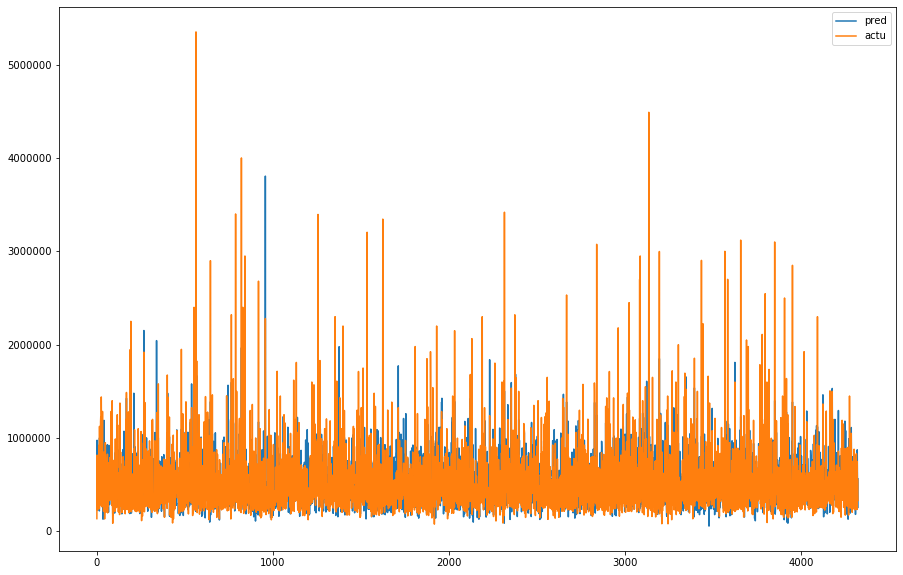

In [72]:
plt.subplots(figsize=(15,10))
plt.plot(y_pred,label='pred')
plt.plot(y_test.values,label='actu')
plt.legend()
plt.show()

In [74]:
import statsmodels.api as sm

In [75]:
x_train[:5]

array([[-0.18748077],
       [ 0.11702707],
       [-0.16573021],
       [ 1.09036466],
       [ 0.18989145]])

In [76]:
x_train=sm.add_constant(x_train)
x_train[:5]

array([[ 1.        , -0.18748077],
       [ 1.        ,  0.11702707],
       [ 1.        , -0.16573021],
       [ 1.        ,  1.09036466],
       [ 1.        ,  0.18989145]])

In [77]:
model=sm.OLS(y_train,x_train).fit()

In [78]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.721e+04
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:06:18   Log-Likelihood:            -2.4016e+05
No. Observations:               17290   AIC:                         4.803e+05
Df Residuals:                   17288   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.407e+05   1983.165    272.668      0.0

In [79]:
theta_0,intercept

(array([260138.34695307]), 540744.7498554079)

In [80]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,house_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


## Multi-Regression

In [82]:
!pip install yellowbrick

In [83]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,house_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [84]:
df.shape

(21613, 16)

In [85]:
target=df['price']

In [86]:
features = df.drop(columns='price')

In [87]:
features.shape

(21613, 15)

In [88]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'house_renovated'],
      dtype='object')

In [91]:
from yellowbrick.target import FeatureCorrelation

feature_names=list(features.columns)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


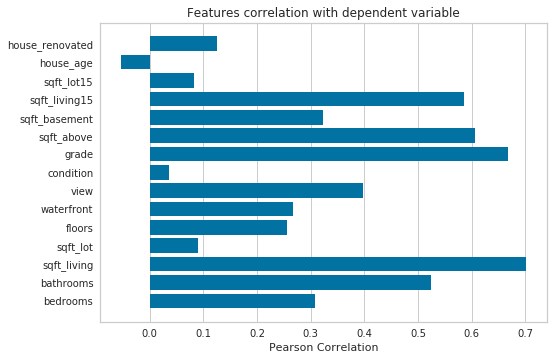

In [92]:
visualizer = FeatureCorrelation(labels=feature_names)
visualizer.fit(features,target)
visualizer.poof()

In [93]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression,mutual_info_regression

In [95]:
select_univariate = SelectKBest(f_regression,k=5).fit(features,target)

In [97]:
feature_mask = select_univariate.get_support()

In [98]:
feature_mask

array([False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False, False, False])

In [100]:
selected_columns= features.columns[feature_mask]
selected_columns

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [102]:
selected_features = features[selected_columns]
selected_features.sample(5)

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
2870,1.75,1720,8,1350,2740
6535,2.75,2850,9,1920,3300
11199,1.75,2310,8,1410,2080
20874,3.50,4130,10,4130,4130
8088,2.50,1690,7,1080,1690


In [103]:
selected_features.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2.114757,2079.899736,7.656873,1788.390691,1986.552492
std,0.770163,918.440897,1.175459,828.090978,685.391304
min,0.000000,290.000000,1.000000,290.000000,399.000000
25%,1.750000,1427.000000,7.000000,1190.000000,1490.000000
50%,2.250000,1910.000000,7.000000,1560.000000,1840.000000
75%,2.500000,2550.000000,8.000000,2210.000000,2360.000000
max,8.000000,13540.000000,13.000000,9410.000000,6210.000000


In [104]:
from sklearn.preprocessing import scale

x = pd.DataFrame(data=scale(selected_features),columns=selected_features.columns)

y= target

x.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,-1.447464,-0.979835,-0.558836,-0.734708,-0.943355
1,0.175607,0.533634,-0.558836,0.460841,-0.432686
2,-1.447464,-1.426254,-1.409587,-1.229834,1.070140
3,1.149449,-0.130550,-0.558836,-0.891699,-0.914174
4,-0.149007,-0.435422,0.291916,-0.130895,-0.272190


In [105]:
x.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.788439e-16,2.419652e-16,2.524855e-16,1.104624e-16,8.153176e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


In [107]:
mx_train,mx_test,my_train,my_test=train_test_split(x,y,test_size=0.2)

In [108]:
multi_linear_reg = LinearRegression()

multi_linear_reg.fit(mx_train,my_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
my_pred = multi_linear_reg.predict(mx_test)

In [110]:
multi_df = pd.DataFrame({'test':my_test,'pred':my_pred})

In [111]:
multi_df.head()

,test,pred
21029,260000.0,557654.361170
15032,537000.0,485449.052032
6663,525000.0,787219.798876
10772,725000.0,763963.575883
12829,727000.0,839074.505629


In [113]:
multi_score = multi_linear_reg.score(mx_train,my_train)
r2score = r2_score(my_test,my_pred)

In [115]:
print('R2 Taining data :',multi_score)
print('R2 Test data : ', r2score)

R2 Taining data : 0.5437323887897119
R2 Test data :  0.5450102452116783


In [116]:
multi_linear_reg.coef_

array([-27171.9276059 , 215709.91160724, 128708.23493287, -60903.46310936,
        19354.99964851])

In [117]:
multi_linear_reg.intercept_

539189.9540447383

In [118]:
smx_train = sm.add_constant(mx_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [120]:
multi_model = sm.OLS(my_train,mx_train).fit()

In [124]:
print(multi_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.168
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              698.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):                        0.00
Time:                        11:34:30   Log-Likelihood:                     -2.5433e+05
No. Observations:               17290   AIC:                                  5.087e+05
Df Residuals:                   17285   BIC:                                  5.087e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------